<a href="https://colab.research.google.com/github/vinkrishna/ExpandingSenses/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Signal and Signal Analysis: Amplitude, Frequency, Phase, and Time-Domain Analytical Methods




# Amplitude
Amplitude is the maximum value of a signal's waveform from the mean or zero value. The amplitude can be expressed as the peak value, peak-to-peak value, or root mean square (RMS) value. The amplitude can provide useful information about the signal's strength or energy.

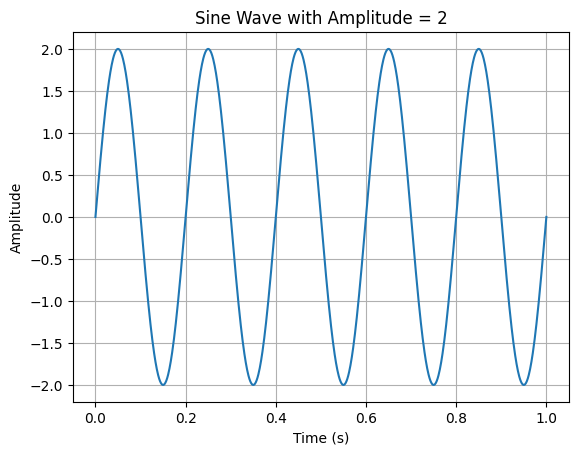

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave
t = np.linspace(0, 1, 1000)  # Time vector
freq = 5  # Frequency (Hz)
amp = 2  # Amplitude
phase = 0  # Phase (radians)
y = amp * np.sin(2 * np.pi * freq * t + phase)

# Plot the signal
plt.plot(t, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave with Amplitude = 2")
plt.grid(True)
plt.show()


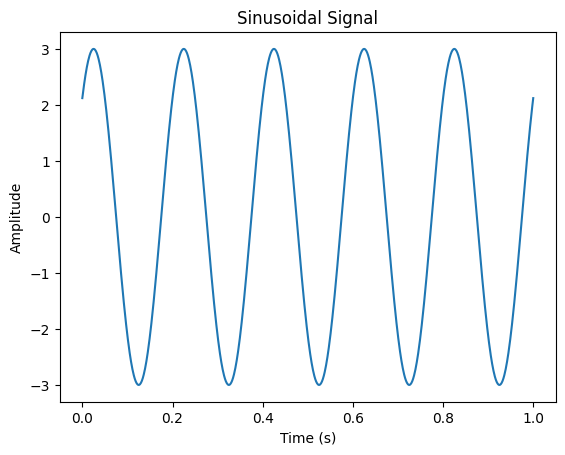

Peak Amplitude: 2.9978777525277454
Peak-to-Peak Amplitude: 5.999990728716487
RMS Amplitude: 2.1213203435596424


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sinusoidal signal
t = np.linspace(0, 1, 1000)
f = 5  # frequency in Hz
A = 3  # amplitude
phi = np.pi / 4  # phase

signal = A * np.sin(2 * np.pi * f * t + phi)

# Calculate amplitude
peak_amplitude = np.max(signal) - np.mean(signal)
peak_to_peak_amplitude = np.max(signal) - np.min(signal)
rms_amplitude = np.sqrt(np.mean(np.square(signal)))

# Plot the signal
plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sinusoidal Signal')
plt.show()

print(f"Peak Amplitude: {peak_amplitude}")
print(f"Peak-to-Peak Amplitude: {peak_to_peak_amplitude}")
print(f"RMS Amplitude: {rms_amplitude}")


#Frequency
Frequency is the number of cycles per unit of time, often measured in Hertz (Hz). In signal analysis, the frequency domain representation can help identify the signal's main frequency components or harmonics.

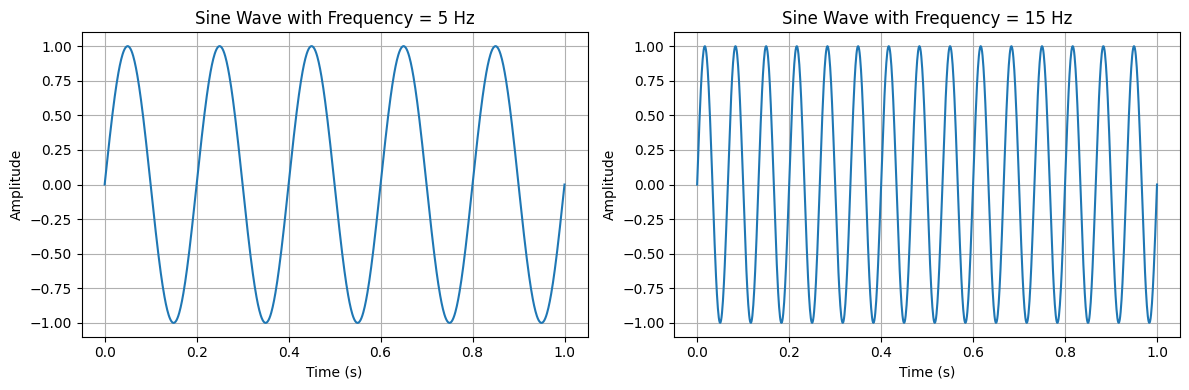

In [3]:
# Generate two sine waves with different frequencies
freq1 = 5
freq2 = 15
y1 = np.sin(2 * np.pi * freq1 * t)
y2 = np.sin(2 * np.pi * freq2 * t)

# Plot the signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave with Frequency = 5 Hz")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, y2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave with Frequency = 15 Hz")
plt.grid(True)
plt.tight_layout()
plt.show()


#Phase
Phase is the relative position of a waveform in time, typically expressed in degrees or radians. The phase difference between two signals can provide insights into their synchronization or time delay.

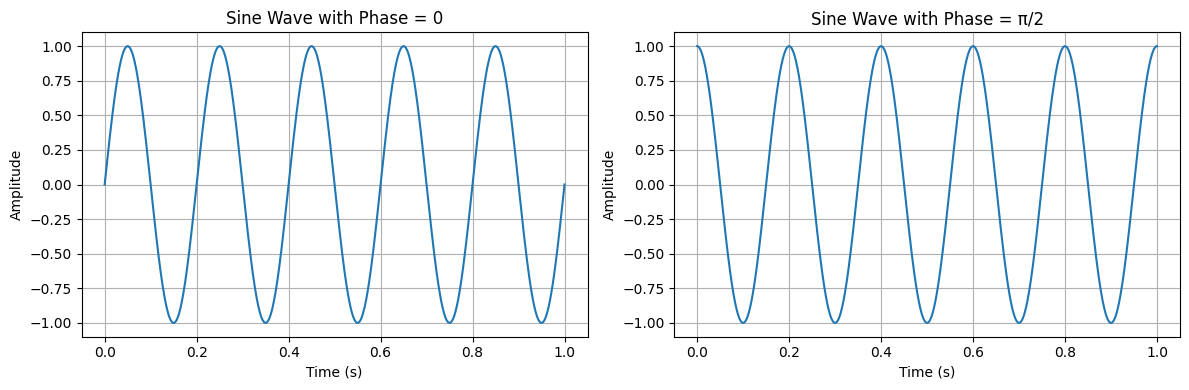

In [4]:
# Generate two sine waves with different phases
phase1 = 0
phase2 = np.pi / 2
y1 = np.sin(2 * np.pi * freq * t + phase1)
y2 = np.sin(2 * np.pi * freq * t + phase2)

# Plot the signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave with Phase = 0")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, y2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave with Phase = π/2")
plt.grid(True)
plt.tight_layout()
plt.show()



#Time-Domain Analytical Methods
Time-domain methods analyze the signal in its original form, focusing on amplitude and time characteristics. Common techniques include signal averaging, time-domain filters, autocorrelation, and cross-correlation.


# Mean
The mean of a signal represents its average value. It can be calculated as the sum of all the signal values divided by the number of values.

In [6]:
# Calculate the mean of a signal
mean_y = np.mean(y)
print("Mean of the signal:", mean_y)


Mean of the signal: -2.842170943040401e-17


# Variance
Variance is a measure of the spread or dispersion of a signal. It is calculated as the average of the squared differences from the mean.

In [7]:
# Calculate the variance of a signal
var_y = np.var(y)
print("Variance of the signal:", var_y)


Variance of the signal: 1.9980000000000002


# Autocorrelation
Autocorrelation is a measure of how a signal correlates with a delayed copy of itself. It is useful for detecting repeating patterns or periodicity within signals.

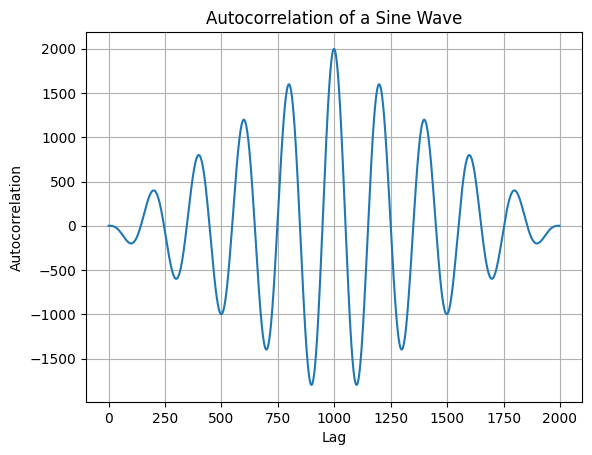

In [8]:
# Compute the autocorrelation of a signal
autocorr_y = np.correlate(y, y, mode="full")

# Plot the autocorrelation
plt.plot(autocorr_y)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of a Sine Wave")
plt.grid(True)
plt.show()


# Cross-Correlation
Cross-correlation is a measure of similarity between two signals as a function of the time lag applied to one of them. It is useful for detecting the presence of a known waveform within a noisy signal.

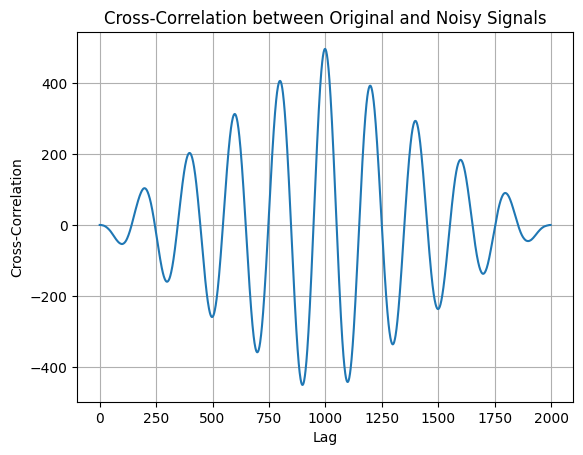

In [9]:
# Generate a noisy signal containing a sine wave
noise = np.random.normal(0, 0.5, len(t))
noisy_signal = y1 + noise

# Compute the cross-correlation between the original and noisy signals
cross_corr = np.correlate(y1, noisy_signal, mode="full")

# Plot the cross-correlation
plt.plot(cross_corr)
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between Original and Noisy Signals")
plt.grid(True)
plt.show()


# Moving Average, Autocorrelation, and Cross-Correlation Combined Code
Except Moving average, the autocorrelation and cross-correlation code remains the similar (except now it is formulated as python function; which can be used for your analysis)

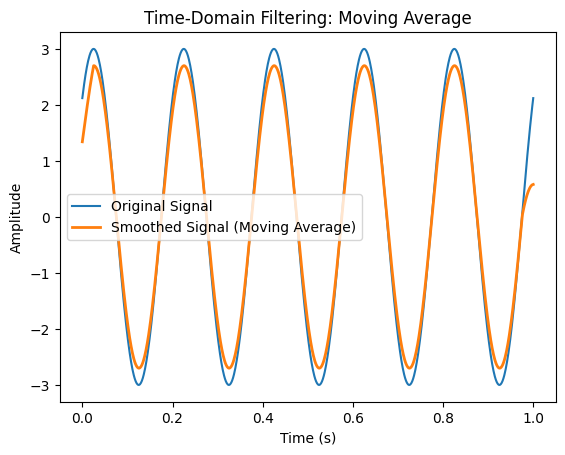

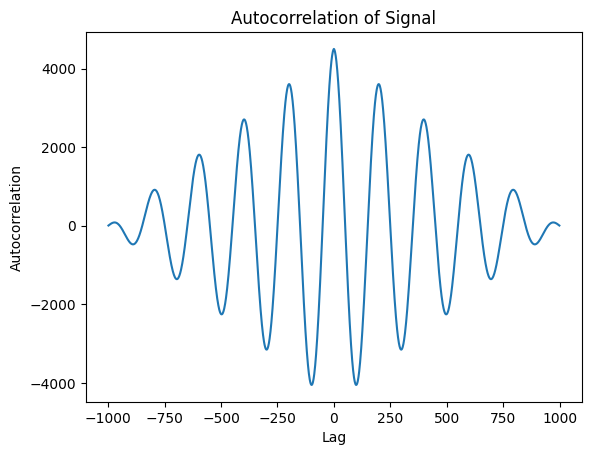

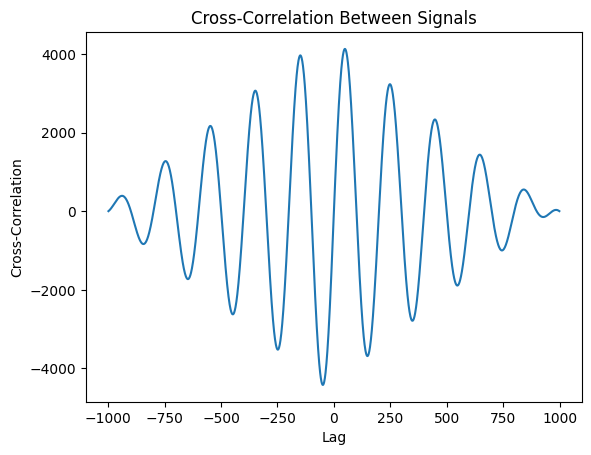

In [10]:
# Example: Moving Average Filter
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

window_size = 50
smoothed_signal = moving_average(signal, window_size)

# Plot original and smoothed signals
plt.plot(t, signal, label='Original Signal')
plt.plot(t, smoothed_signal, label='Smoothed Signal (Moving Average)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Moving Average')
plt.show()

# Example: Autocorrelation
def autocorrelation(signal):
    return np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')

autocorr_signal = autocorrelation(signal)
autocorr_lags = np.arange(-len(signal) + 1, len(signal))

# Plot autocorrelation
plt.plot(autocorr_lags, autocorr_signal)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Signal')
plt.show()

# Example: Cross-Correlation
def crosscorrelation(signal1, signal2):
    return np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')

crosscorr_signal = crosscorrelation(signal, signal2)
crosscorr_lags = np.arange(-len(signal) + 1, len(signal))

# Plot cross-correlation
plt.plot(crosscorr_lags, crosscorr_signal)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Between Signals')
plt.show()


# Amplitude, phase, frequency and time on EEG Data
In this example, we simulate an 8-channel EEG dataset and demonstrate amplitude, phase, frequency, and time-domain analysis methods using the generated data. These examples can be used as a starting point for more complex analysis of multi-channel EEG data.

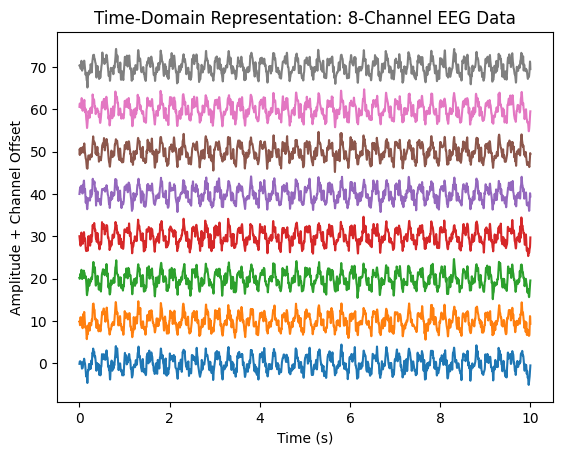

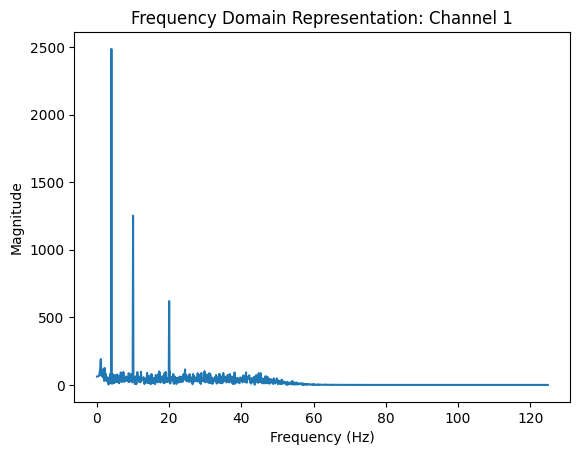

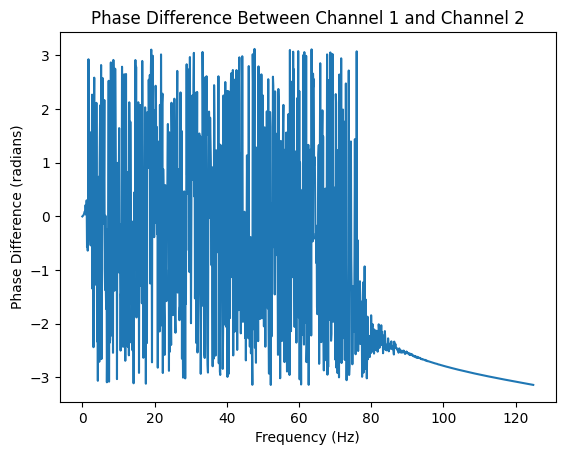

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Function to create a Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Generate synthetic 8-channel EEG data
np.random.seed(42)
fs = 250  # sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # time vector
num_channels = 8

# Generate random EEG-like signals
eeg_data = np.random.normal(0, 1, (num_channels, len(t)))

# Add sinusoidal components to the EEG data to simulate brain rhythms
freqs = [4, 10, 20]  # frequencies in Hz
amplitudes = [2, 1, 0.5]  # amplitudes
phases = [0, np.pi / 4, np.pi / 2]  # phases

for channel in range(num_channels):
    for f, A, phi in zip(freqs, amplitudes, phases):
        eeg_data[channel] += A * np.sin(2 * np.pi * f * t + phi)

# Band-pass filter the EEG data to keep frequency components within the range of 1-50 Hz
lowcut, highcut = 1, 50
eeg_data_filtered = np.zeros_like(eeg_data)

for channel in range(num_channels):
    eeg_data_filtered[channel] = butter_bandpass_filter(eeg_data[channel], lowcut, highcut, fs)

# Calculate the FFT of the filtered EEG data
eeg_fft = np.fft.fft(eeg_data_filtered, axis=1)
freqs_fft = np.fft.fftfreq(len(t), 1 / fs)

# Calculate the phase difference between channel 1 and channel 2
cross_spectrum = eeg_fft[0] * np.conj(eeg_fft[1])
phase_diff = np.angle(cross_spectrum)

# Plot the time-domain representation of the 8-channel EEG data
plt.figure()
for channel in range(num_channels):
    plt.plot(t, eeg_data_filtered[channel] + 10 * channel)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude + Channel Offset')
plt.title('Time-Domain Representation: 8-Channel EEG Data')
plt.show()

# Plot the frequency-domain representation of channel 1
plt.figure()
plt.plot(freqs_fft[:len(freqs_fft)//2], np.abs(eeg_fft[0][:len(eeg_fft[0])//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation: Channel 1')
plt.show()

# Plot the phase difference between channel 1 and channel 2
plt.figure()
plt.plot(freqs_fft[:len(freqs_fft)//2], phase_diff[:len(phase_diff)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Difference (radians)')
plt.title('Phase Difference Between Channel 1 and Channel 2')
plt.show()


#

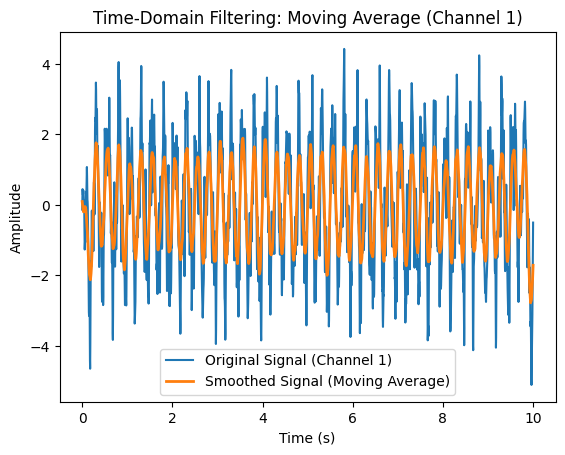

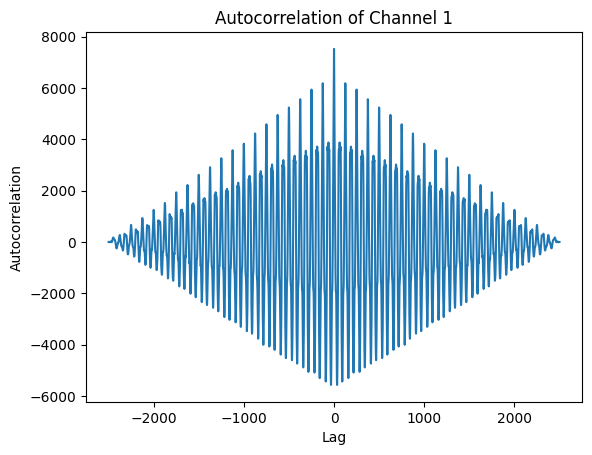

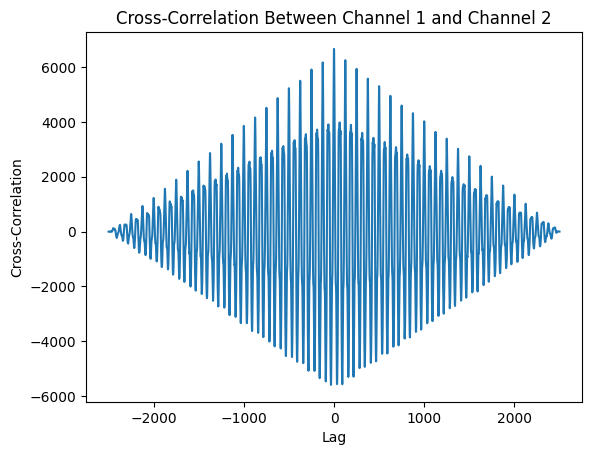

In [ ]:
#Time-domain analysis: Moving average filter
def moving_average(signal, window_size):
  return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

window_size = 25
smoothed_eeg_data = np.zeros_like(eeg_data_filtered)

for channel in range(num_channels):
  smoothed_eeg_data[channel] = moving_average(eeg_data_filtered[channel], window_size)

#Plot original and smoothed signals of channel 1
plt.figure()
plt.plot(t, eeg_data_filtered[0], label='Original Signal (Channel 1)')
plt.plot(t, smoothed_eeg_data[0], label='Smoothed Signal (Moving Average)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Moving Average (Channel 1)')
plt.show()

#Autocorrelation of channel 1
def autocorrelation(signal):
  return np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')

autocorr_eeg_signal = autocorrelation(eeg_data_filtered[0])
autocorr_lags = np.arange(-len(t) + 1, len(t))

#Plot autocorrelation
plt.figure()
plt.plot(autocorr_lags, autocorr_eeg_signal)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Channel 1')
plt.show()

#Cross-correlation between channel 1 and channel 2
def crosscorrelation(signal1, signal2):
  return np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')

crosscorr_eeg_signal = crosscorrelation(eeg_data_filtered[0], eeg_data_filtered[1])
crosscorr_lags = np.arange(-len(t) + 1, len(t))

#Plot cross-correlation
plt.figure()
plt.plot(crosscorr_lags, crosscorr_eeg_signal)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Between Channel 1 and Channel 2')
plt.show()

#Time-Domain Analysis
In time-domain analysis, we study signals in their original form, focusing on the amplitude and time characteristics. Some common time-domain techniques include:
#Signal averaging
#Time-domain filters (e.g., moving average, Gaussian filters)
#Autocorrelation
#Cross-correlation


#Signal Averaging
Signal averaging is a technique used to reduce random noise in a signal by averaging multiple instances of the signal or segments of the signal. This is especially useful when the signal of interest is repetitive and the noise is uncorrelated.

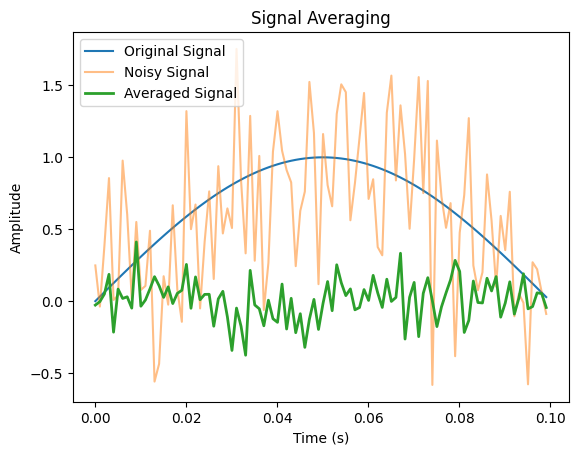

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic noisy signal
np.random.seed(42)
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t)
noisy_signal = signal + np.random.normal(0, 0.5, len(t))

# Segment and average the signal
num_segments = 10
segment_length = len(t) // num_segments
averaged_signal = np.mean(noisy_signal.reshape(num_segments, segment_length), axis=0)

# Plot original, noisy, and averaged signals
plt.plot(t[:segment_length], signal[:segment_length], label='Original Signal')
plt.plot(t[:segment_length], noisy_signal[:segment_length], label='Noisy Signal', alpha=0.5)
plt.plot(t[:segment_length], averaged_signal, label='Averaged Signal', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Signal Averaging')
plt.show()


#Time-Domain Filters: Moving Average and Gaussian Filters
Time-domain filters are used to smooth or remove specific frequency components from a signal. Two common filters are the moving average filter and the Gaussian filter.

#Moving Average Filter

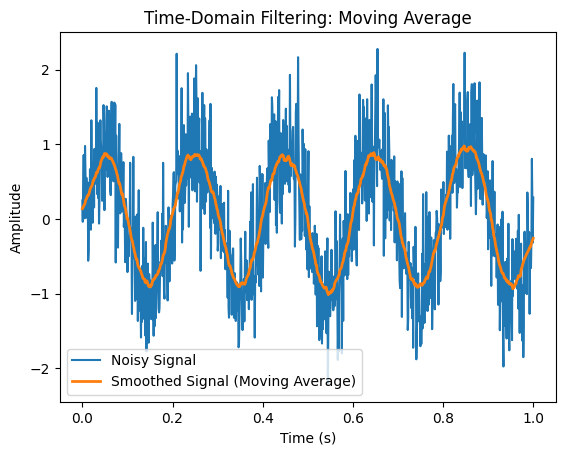

In [ ]:
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

window_size = 50
smoothed_signal = moving_average(noisy_signal, window_size)

plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, smoothed_signal, label='Smoothed Signal (Moving Average)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Moving Average')
plt.show()


#Gaussian Filter

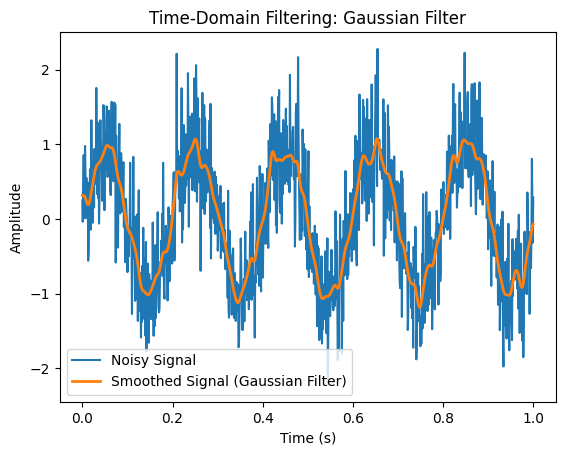

In [ ]:
from scipy.ndimage import gaussian_filter

sigma = 5
smoothed_signal_gaussian = gaussian_filter(noisy_signal, sigma)

plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, smoothed_signal_gaussian, label='Smoothed Signal (Gaussian Filter)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Gaussian Filter')
plt.show()


#Autocorrelation
Autocorrelation is a technique used to determine the similarity of a signal with a time-shifted version of itself. It can be helpful in finding repeating patterns or periodicity in a signal.



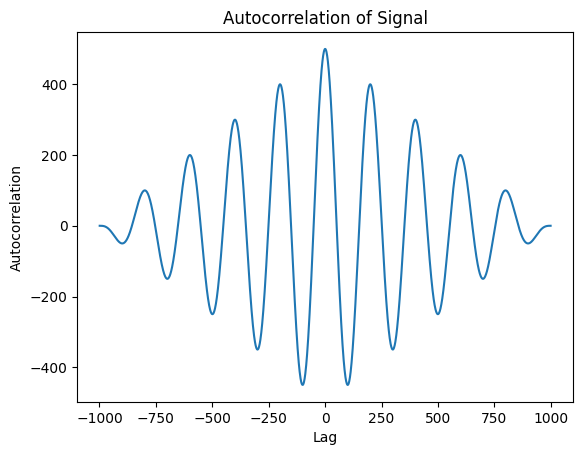

In [ ]:
def autocorrelation(signal):
    return np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')

autocorr_signal = autocorrelation(signal)
autocorr_lags = np.arange(-len(t) + 1, len(t))

plt.plot(autocorr_lags, autocorr_signal)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Signal')
plt.show()


#Cross-Correlation

Cross-correlation is a technique used to determine the similarity between two signals by comparing one signal with a time-shifted version of the other signal. It is useful in finding the time lag between two signals, measuring the similarity between them, and identifying features that are common in both signals.


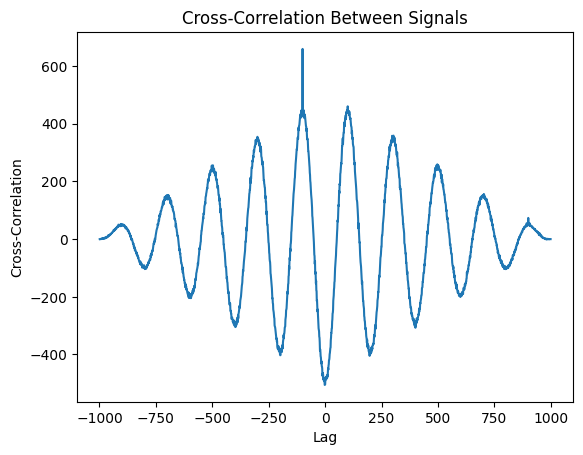

In [ ]:
# Generate a second synthetic noisy signal with a time shift
time_shift = 100
shifted_signal = np.roll(noisy_signal, time_shift)

def crosscorrelation(signal1, signal2):
    return np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')

crosscorr_signal = crosscorrelation(noisy_signal, shifted_signal)
crosscorr_lags = np.arange(-len(t) + 1, len(t))

plt.plot(crosscorr_lags, crosscorr_signal)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Between Signals')
plt.show()

# Time-domain analysis techniques on 8-channel EEG data
In this example, we simulate an 8-channel EEG dataset and demonstrated time-domain analysis methods, such as signal averaging, moving average filter, Gaussian filter, autocorrelation, and cross-correlation, using the generated data. 


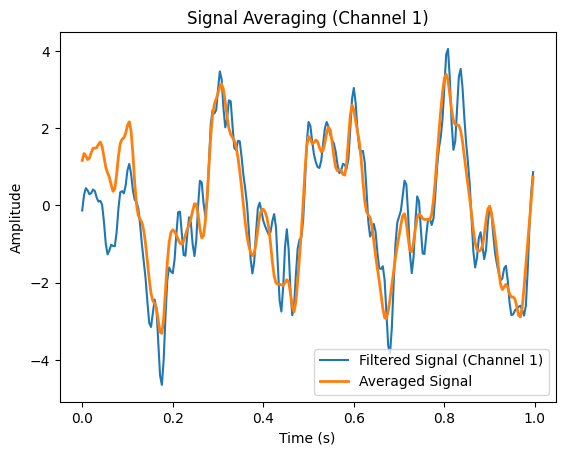

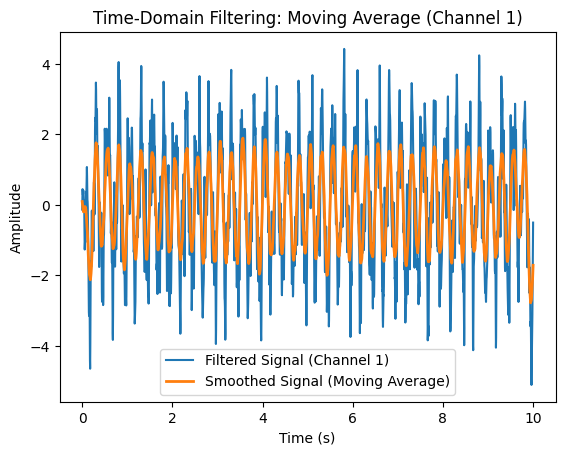

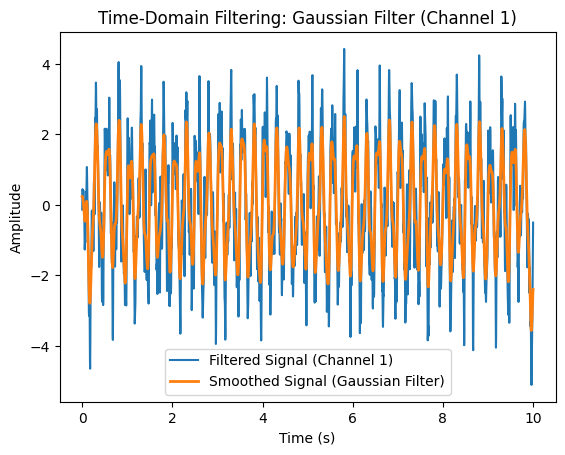

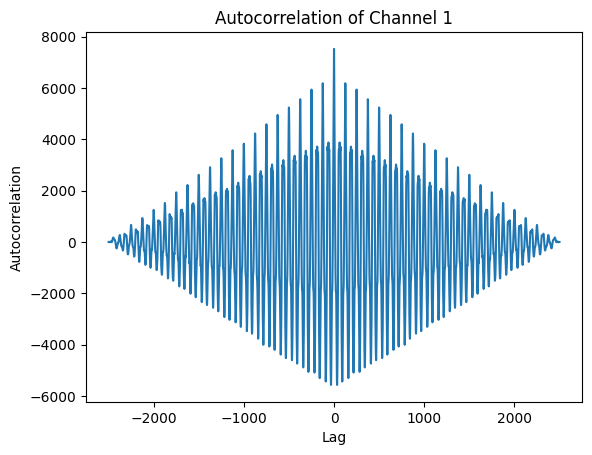

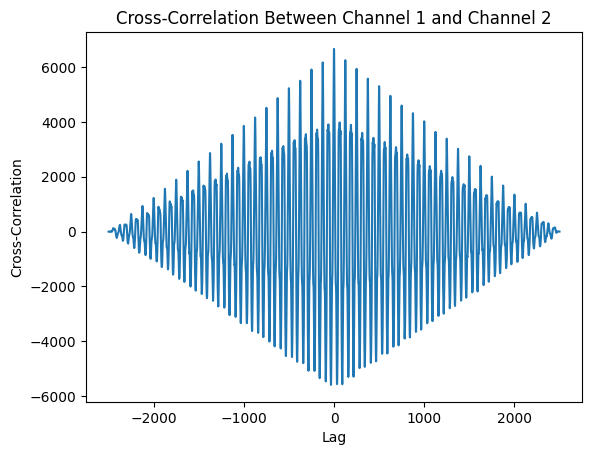

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.ndimage import gaussian_filter

# Function to create a Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Generate synthetic 8-channel EEG data
np.random.seed(42)
fs = 250  # sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # time vector
num_channels = 8

# Generate random EEG-like signals
eeg_data = np.random.normal(0, 1, (num_channels, len(t)))

# Add sinusoidal components to the EEG data to simulate brain rhythms
freqs = [4, 10, 20]  # frequencies in Hz
amplitudes = [2, 1, 0.5]  # amplitudes
phases = [0, np.pi / 4, np.pi / 2]  # phases

for channel in range(num_channels):
    for f, A, phi in zip(freqs, amplitudes, phases):
        eeg_data[channel] += A * np.sin(2 * np.pi * f * t + phi)

# Band-pass filter the EEG data to keep frequency components within the range of 1-50 Hz
lowcut, highcut = 1, 50
eeg_data_filtered = np.zeros_like(eeg_data)

for channel in range(num_channels):
    eeg_data_filtered[channel] = butter_bandpass_filter(eeg_data[channel], lowcut, highcut, fs)

# Time-domain analysis techniques
# Signal averaging
num_segments = 10
segment_length = len(t) // num_segments
averaged_signal = np.mean(eeg_data_filtered[0].reshape(num_segments, segment_length), axis=0)

# Moving average filter
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

window_size = 25
smoothed_signal = moving_average(eeg_data_filtered[0], window_size)

# Gaussian filter
sigma = 5
smoothed_signal_gaussian = gaussian_filter(eeg_data_filtered[0], sigma)

# Autocorrelation
def autocorrelation(signal):
    return np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')

autocorr_signal = autocorrelation(eeg_data_filtered[0])
autocorr_lags = np.arange(-len(t) + 1, len(t))

# Cross-correlation
def crosscorrelation(signal1, signal2):
    return np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')

crosscorr_signal = crosscorrelation(eeg_data_filtered[0], eeg_data_filtered[1])
crosscorr_lags = np.arange(-len(t) + 1, len(t))

plt.figure()
plt.plot(t[:segment_length], eeg_data_filtered[0][:segment_length], label='Filtered Signal (Channel 1)')
plt.plot(t[:segment_length], averaged_signal, label='Averaged Signal', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Signal Averaging (Channel 1)')
plt.show()

plt.figure()
plt.plot(t, eeg_data_filtered[0], label='Filtered Signal (Channel 1)')
plt.plot(t, smoothed_signal, label='Smoothed Signal (Moving Average)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Moving Average (Channel 1)')
plt.show()

plt.figure()
plt.plot(t, eeg_data_filtered[0], label='Filtered Signal (Channel 1)')
plt.plot(t, smoothed_signal_gaussian, label='Smoothed Signal (Gaussian Filter)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Gaussian Filter (Channel 1)')
plt.show()

plt.figure()
plt.plot(autocorr_lags, autocorr_signal)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Channel 1')
plt.show()

plt.figure()
plt.plot(crosscorr_lags, crosscorr_signal)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Between Channel 1 and Channel 2')
plt.show()






#Frequency-Domain Analysis

Frequency-domain analysis involves transforming the time-domain signal into its frequency components, allowing us to study the signal's frequency and phase characteristics. This analysis is crucial for understanding the spectral properties of signals and identifying dominant frequency components. In this section, we will discuss some common frequency-domain techniques, including Fourier Transform, Fast Fourier Transform (FFT), Power Spectral Density (PSD), and Spectrogram.

#Fourier Transform
The Fourier Transform is a mathematical technique that transforms a time-domain signal into its frequency components. It provides information about the signal's frequency and phase characteristics, allowing us to identify dominant frequencies and analyze periodic components.

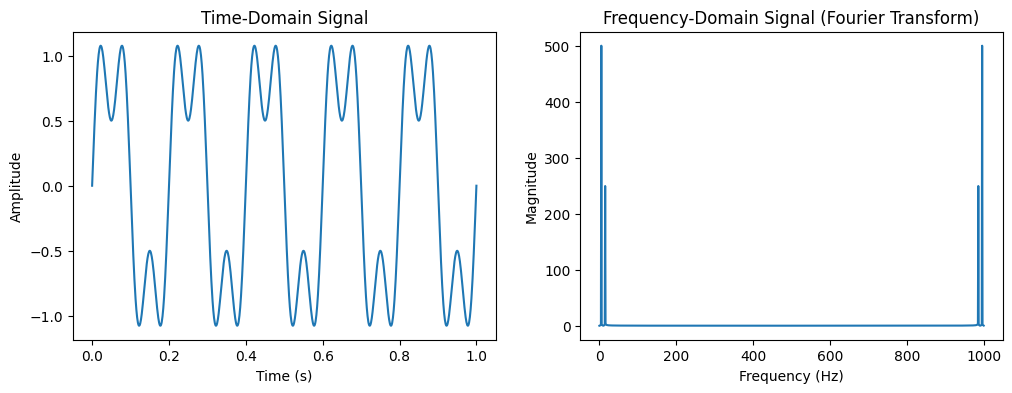

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Discrete Fourier Transform function
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

# Generate a synthetic signal
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 15 * t)

# Compute the Discrete Fourier Transform
X = dft(signal)

# Plot the signal and its frequency components
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(t, signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Time-Domain Signal')

ax2.plot(np.linspace(0, 1000, len(X)), np.abs(X))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency-Domain Signal (Fourier Transform)')
plt.show()


#Fast Fourier Transform (FFT)
The Fast Fourier Transform (FFT) is an efficient algorithm for computing the Discrete Fourier Transform (DFT) of a sequence. It reduces the computational complexity of the DFT, making it suitable for real-time signal processing and analysis.

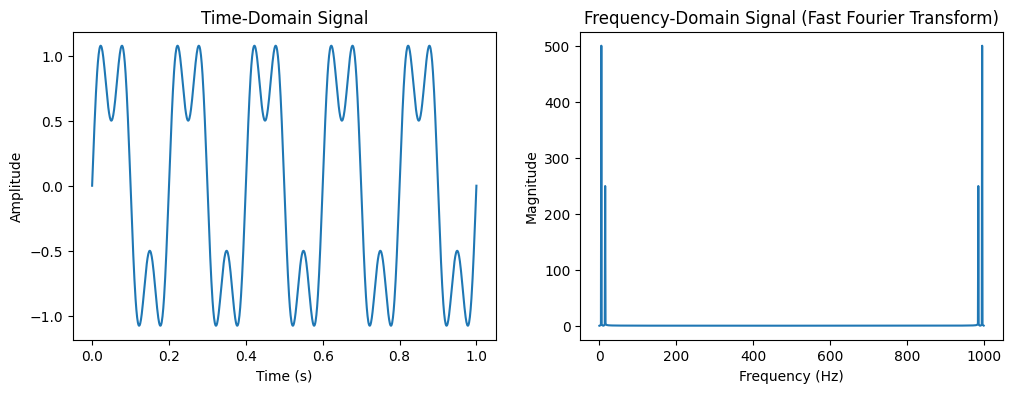

In [ ]:
from scipy.fft import fft

# Compute the Fast Fourier Transform
X_fft = fft(signal)

# Plot the signal and its frequency components
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(t, signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Time-Domain Signal')

ax2.plot(np.linspace(0, 1000, len(X_fft)), np.abs(X_fft))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency-Domain Signal (Fast Fourier Transform)')
plt.show()


#Power Spectral Density (PSD)
The Power Spectral Density (PSD) is a function that describes how the power of a signal is distributed across different frequencies. It is useful for identifying dominant frequency components and characterizing the spectral content of signals.

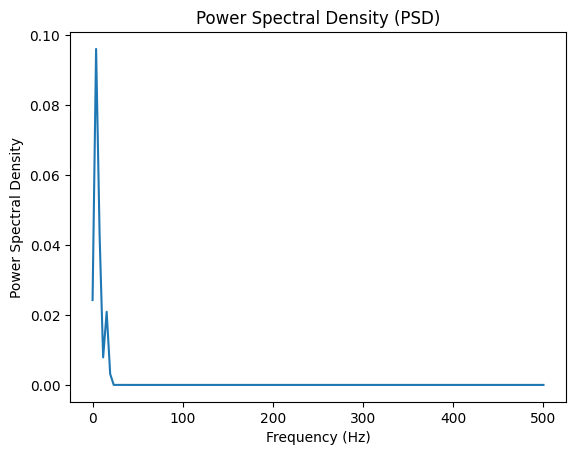

In [ ]:
from scipy.signal import welch

# Compute the Power Spectral Density using Welch's method
f, Pxx = welch(signal, fs=1000, nperseg=256)

# Plot the Power Spectral Density
plt.plot(f, Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density (PSD)')

plt.show()


#Spectrogram

A spectrogram is a visual representation of the frequency content of a signal as it evolves over time. It is obtained by dividing the signal into short segments, computing the power spectral density for each segment, and then displaying the results as a two-dimensional plot with time on the x-axis, frequency on the y-axis, and power on the z-axis (usually represented as color intensity).


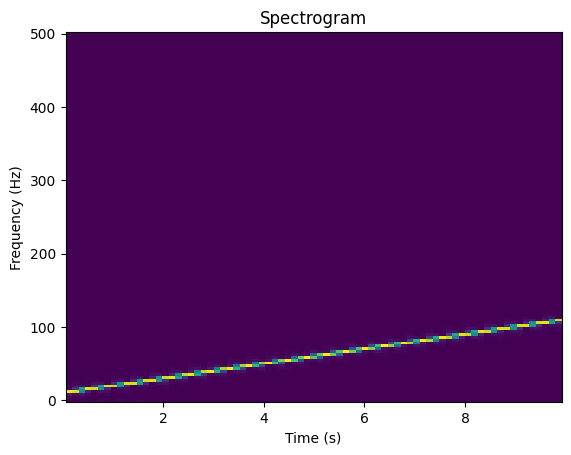

In [ ]:
from scipy.signal import spectrogram

# Generate a synthetic signal with varying frequency components
t = np.linspace(0, 10, 10000)
signal = np.sin(2 * np.pi * (10 + 5 * t) * t)

# Compute the spectrogram
f, t_spec, Sxx = spectrogram(signal, fs=1000, nperseg=256, noverlap=128)

# Plot the spectrogram
plt.pcolormesh(t_spec, f, Sxx, shading='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.show()

# EEG data: Example of applying Fourier Transform, Fast Fourier Transform (FFT), Power Spectral Density (PSD), and Spectrogram to simulated EEG 8 channel data

<ipython-input-17-c3344f8fa05d>:48: ComplexWarning: Casting complex values to real discards the imaginary part
  X[channel] = np.fft.fft(eeg_data_filtered[channel])
<ipython-input-17-c3344f8fa05d>:54: ComplexWarning: Casting complex values to real discards the imaginary part
  X_fft[channel] = np.fft.fft(eeg_data_filtered[channel])


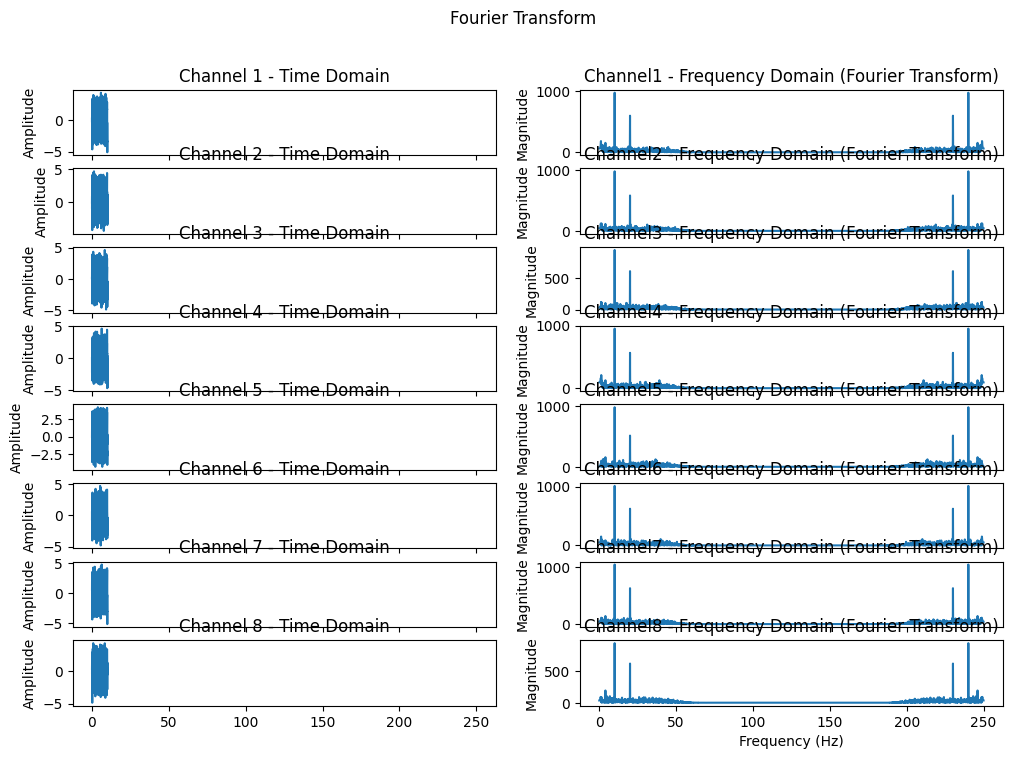

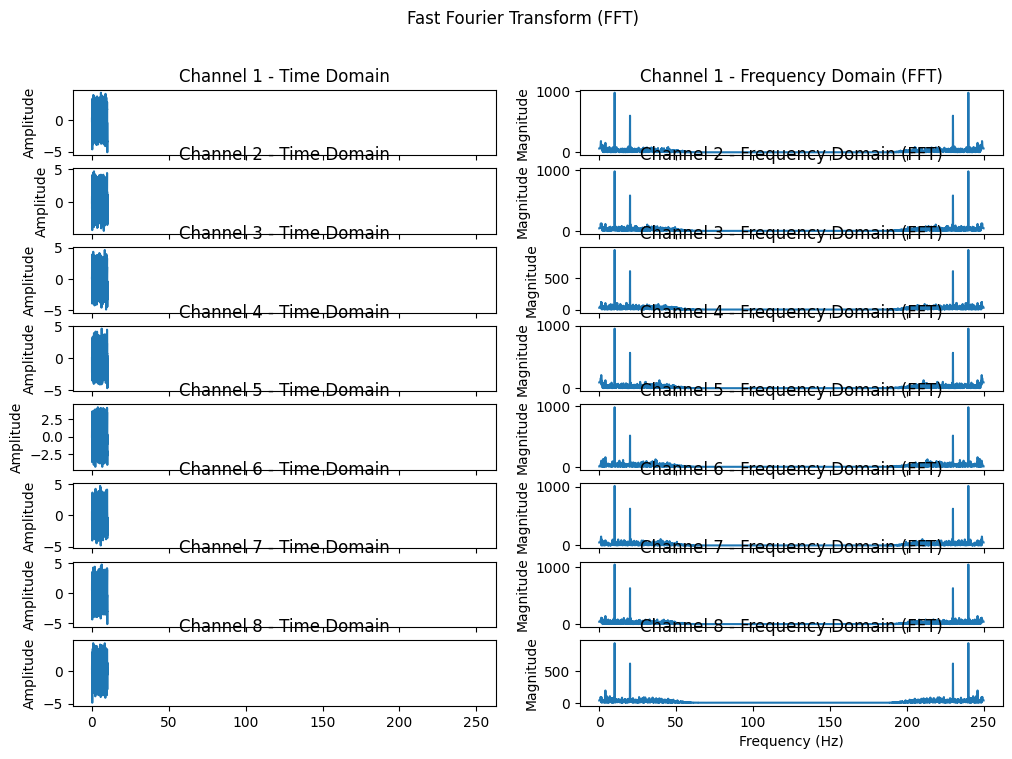

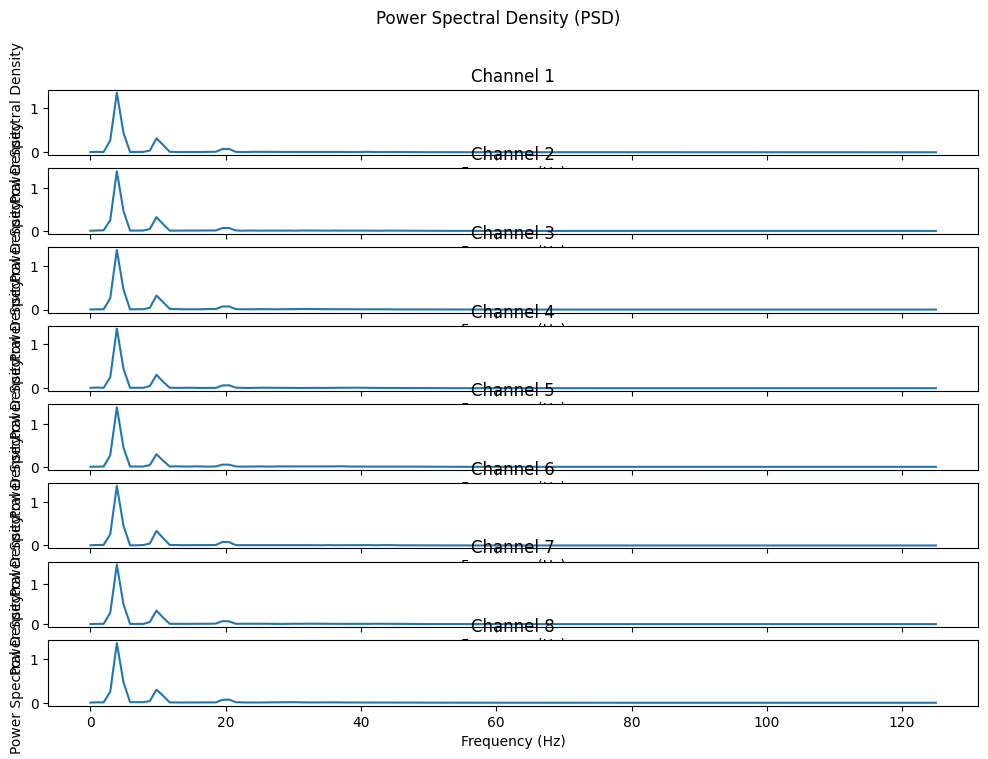

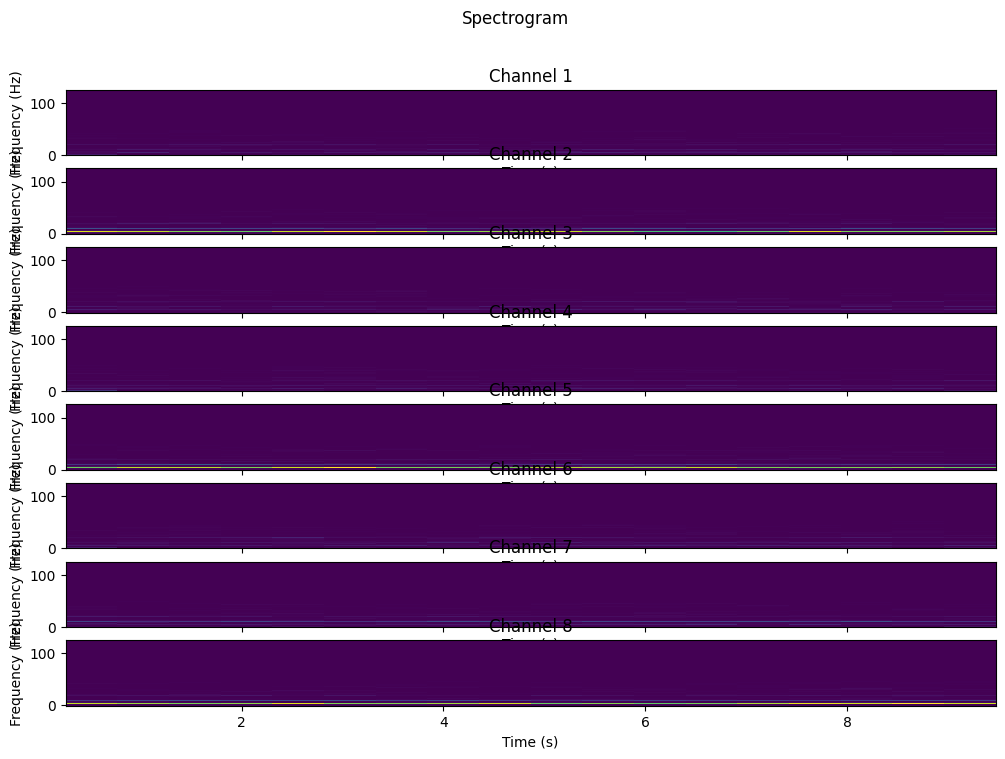

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch, spectrogram

# Function to create a Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Generate synthetic 8-channel EEG data
np.random.seed(42)
fs = 250  # sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # time vector
num_channels = 8

# Generate random EEG-like signals
eeg_data = np.random.normal(0, 1, (num_channels, len(t)))

# Add sinusoidal components to the EEG data to simulate brain rhythms
freqs = [4, 10, 20]  # frequencies in Hz
amplitudes = [2, 1, 0.5]  # amplitudes
phases = [0, np.pi / 4, np.pi / 2]  # phases

for channel in range(num_channels):
    for f, A, phi in zip(freqs, amplitudes, phases):
        eeg_data[channel] += A * np.sin(2 * np.pi * f * t + phi)

# Band-pass filter the EEG data to keep frequency components within the range of 1-50 Hz
lowcut, highcut = 1, 50
eeg_data_filtered = np.zeros_like(eeg_data)

for channel in range(num_channels):
    eeg_data_filtered[channel] = butter_bandpass_filter(eeg_data[channel], lowcut, highcut, fs)

# Frequency-domain analysis techniques
# Fourier Transform
X = np.zeros_like(eeg_data_filtered)

for channel in range(num_channels):
    X[channel] = np.fft.fft(eeg_data_filtered[channel])

# Fast Fourier Transform (FFT)
X_fft = np.zeros_like(eeg_data_filtered)

for channel in range(num_channels):
    X_fft[channel] = np.fft.fft(eeg_data_filtered[channel])

# Power Spectral Density (PSD)
f, Pxx = welch(eeg_data_filtered[0], fs=fs, nperseg=256)

# Spectrogram
f_spec, t_spec, Sxx = spectrogram(eeg_data_filtered[0], fs=fs, nperseg=256, noverlap=128)

# Plot the results
# Fourier Transform
fig, axs = plt.subplots(num_channels, 2, figsize=(12, 8), sharex=True)
for channel in range(num_channels):
    axs[channel, 0].plot(t, eeg_data_filtered[channel])
    axs[channel, 0].set_ylabel('Amplitude')
    axs[channel, 0].set_title(f'Channel {channel+1} - Time Domain')

    axs[channel, 1].plot(np.linspace(0, fs, len(X[channel])), np.abs(X[channel]))
    axs[channel, 1].set_ylabel('Magnitude')
    axs[channel, 1].set_title(f'Channel{channel+1} - Frequency Domain (Fourier Transform)')

fig.suptitle('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.show()

#Fast Fourier Transform (FFT)
fig, axs = plt.subplots(num_channels, 2, figsize=(12, 8), sharex=True)
for channel in range(num_channels):
  axs[channel, 0].plot(t, eeg_data_filtered[channel])
  axs[channel, 0].set_ylabel('Amplitude')
  axs[channel, 0].set_title(f'Channel {channel+1} - Time Domain')
  axs[channel, 1].plot(np.linspace(0, fs, len(X_fft[channel])), np.abs(X_fft[channel]))
  axs[channel, 1].set_ylabel('Magnitude')
  axs[channel, 1].set_title(f'Channel {channel+1} - Frequency Domain (FFT)')
fig.suptitle('Fast Fourier Transform (FFT)')
plt.xlabel('Frequency (Hz)')
plt.show()

#Power Spectral Density (PSD)
fig, axs = plt.subplots(num_channels, figsize=(12, 8), sharex=True)
for channel in range(num_channels):
  f, Pxx = welch(eeg_data_filtered[channel], fs=fs, nperseg=256)
  axs[channel].plot(f, Pxx)
  axs[channel].set_xlabel('Frequency (Hz)')
  axs[channel].set_ylabel('Power Spectral Density')
  axs[channel].set_title(f'Channel {channel+1}')

fig.suptitle('Power Spectral Density (PSD)')
plt.show()

#Spectrogram
fig, axs = plt.subplots(num_channels, figsize=(12, 8), sharex=True)
for channel in range(num_channels):
  f_spec, t_spec, Sxx = spectrogram(eeg_data_filtered[channel], fs=fs, nperseg=256, noverlap=128)
  axs[channel].pcolormesh(t_spec, f_spec, Sxx, shading='auto')
  axs[channel].set_xlabel('Time (s)')
  axs[channel].set_ylabel('Frequency (Hz)')
  axs[channel].set_title(f'Channel {channel+1}')

fig.suptitle('Spectrogram')
plt.show()

#Time-frequency analysis 
Time-frequency analysis techniques are essential for studying signals that vary in both time and frequency domains. In this section, we will discuss some common time-frequency analysis techniques, including Short-Time Fourier Transform (STFT), Continuous Wavelet Transform (CWT), and Discrete Wavelet Transform (DWT).

#Short-Time Fourier Transform (STFT)
The Short-Time Fourier Transform (STFT) is a time-frequency analysis technique that involves applying the Fourier Transform to small, overlapping segments of a signal. By applying the Fourier Transform to each segment, we can analyze the frequency content of the signal over time.

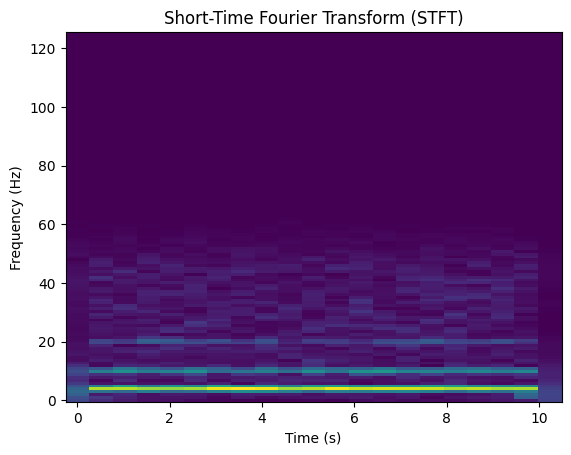

In [ ]:
from scipy.signal import stft

# Compute the Short-Time Fourier Transform
f_stft, t_stft, Zxx = stft(eeg_data_filtered[0], fs=fs, nperseg=256, noverlap=128)

# Plot the Short-Time Fourier Transform
plt.pcolormesh(t_stft, f_stft, np.abs(Zxx), shading='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Short-Time Fourier Transform (STFT)')
plt.show()


#Continuous Wavelet Transform (CWT)
The Continuous Wavelet Transform (CWT) is a time-frequency analysis technique that involves convolving a signal with a wavelet function that varies in both time and frequency. The CWT provides a high resolution time-frequency analysis of a signal and is useful for analyzing non-stationary signals.

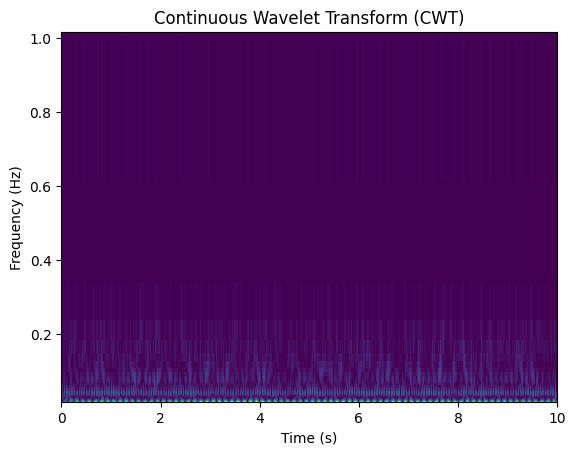

In [ ]:
import pywt

# Compute the Continuous Wavelet Transform using the Morlet wavelet
wavelet = pywt.ContinuousWavelet('morl')
cwtmatr, freqs = pywt.cwt(eeg_data_filtered[0], np.arange(1, 50), wavelet=wavelet)

# Plot the Continuous Wavelet Transform
plt.pcolormesh(t, freqs, np.abs(cwtmatr), shading='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Continuous Wavelet Transform (CWT)')
plt.show()


#Discrete Wavelet Transform (DWT)
The Discrete Wavelet Transform (DWT) is a time-frequency analysis technique that involves decomposing a signal into different frequency sub-bands using a series of low-pass and high-pass filters. The DWT is useful for analyzing signals with varying frequency content and is often used for denoising and compression.

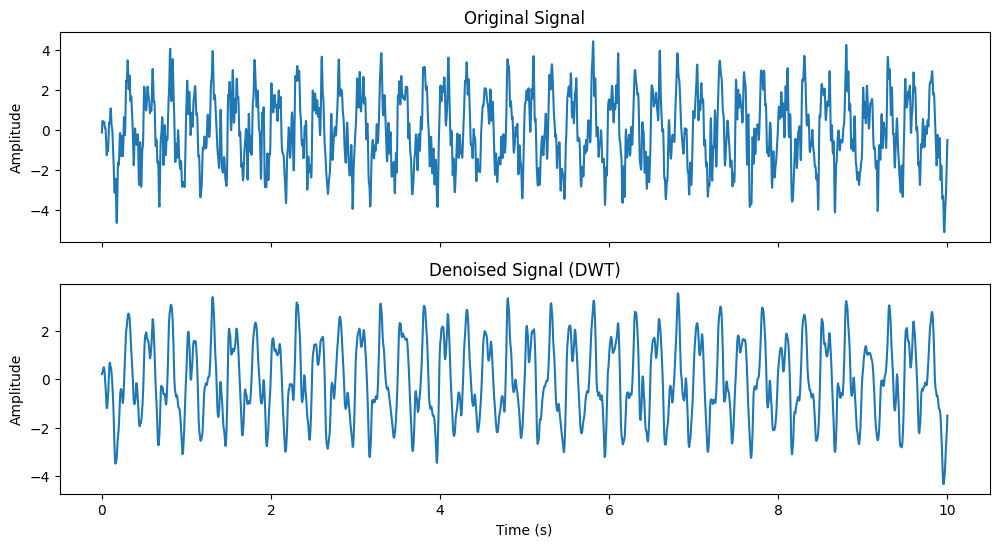

In [ ]:
# Compute the Discrete Wavelet Transform using the db4 wavelet
coeffs = pywt.wavedec(eeg_data_filtered[0], 'db4')

# Reconstruct the signal using only the first 3 frequency sub-bands
reconstructed = pywt.waverec(coeffs[:-3] + [None] * 3, 'db4')

# Remove the last two samples from the reconstructed signal to match the length of the original signal
reconstructed = reconstructed[:-2]

# Plot the original signal and the reconstructed signal
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
axs[0].plot(t, eeg_data_filtered[0])
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Original Signal')

axs[1].plot(t, reconstructed)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Denoised Signal (DWT)')
plt.show()


#EEG Data: Time-Frequency Analysis
Here are the Python code snippets (on an 8-channel EEG dataset) for performing 
* Short-Time Fourier Transform (STFT)
* Continuous Wavelet Transform (CWT), and 
* Discrete Wavelet Transform (DWT) 





#Short-Time Fourier Transform (STFT)

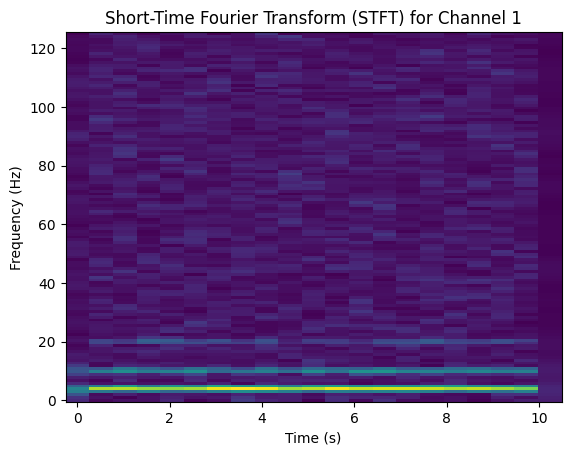

In [ ]:
from scipy.signal import stft

# Compute the Short-Time Fourier Transform for each channel
stft_data = []
for i in range(num_channels):
    _, _, Zxx = stft(eeg_data[i], fs=fs, nperseg=256, noverlap=128)
    stft_data.append(np.abs(Zxx))

# Plot the Short-Time Fourier Transform for channel 1
plt.pcolormesh(t_stft, f_stft, stft_data[0], shading='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Short-Time Fourier Transform (STFT) for Channel 1')
plt.show()


#Continuous Wavelet Transform (CWT)

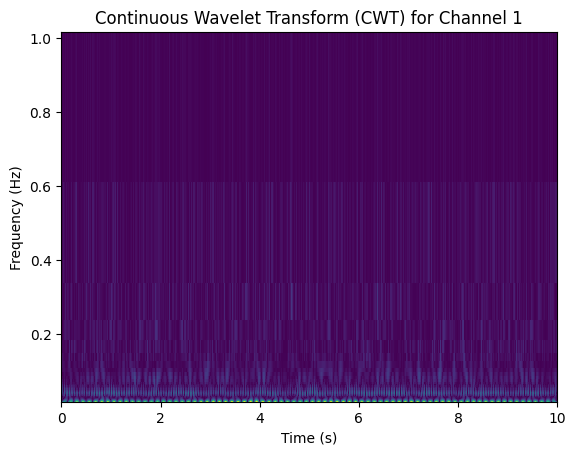

In [ ]:
import pywt

# Compute the Continuous Wavelet Transform using the Morlet wavelet for each channel
cwt_data = []
wavelet = pywt.ContinuousWavelet('morl')
for i in range(num_channels):
    cwtmatr, freqs = pywt.cwt(eeg_data[i], np.arange(1, 50), wavelet=wavelet)
    cwt_data.append(np.abs(cwtmatr))

# Plot the Continuous Wavelet Transform for channel 1
plt.pcolormesh(t, freqs, cwt_data[0], shading='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Continuous Wavelet Transform (CWT) for Channel 1')
plt.show()


#Discrete Wavelet Transform (DWT)

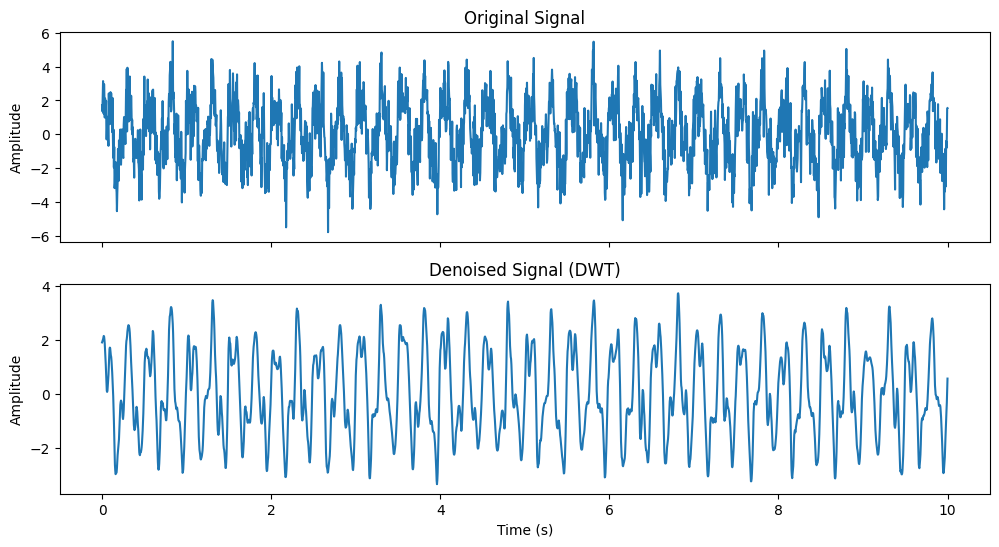

In [ ]:
# Compute the Discrete Wavelet Transform using the db4 wavelet for each channel
dwt_data = []
for i in range(num_channels):
    coeffs = pywt.wavedec(eeg_data[i], 'db4')
    reconstructed = pywt.waverec(coeffs[:-3] + [None] * 3, 'db4')
    reconstructed = reconstructed[:-2]
    dwt_data.append(reconstructed)

# Plot the original signal and the reconstructed signal for channel 1
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
axs[0].plot(t, eeg_data[0])
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Original Signal')

axs[1].plot(t, dwt_data[0])
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Denoised Signal (DWT)')
plt.show()


I hope these code snippets are helpful!

#signal processing pipeline
signal processing pipeline consists of several steps, which include data acquisition, pre-processing, feature extraction, and classification.

#Data Acquisition
The first step in the signal processing pipeline is data acquisition, which involves the collection of raw signals from sensors or measurement devices. This step is critical because it determines the quality and reliability of the data. The choice of sensors or measurement devices depends on the specific application and the type of signal being measured. For example, in EEG studies, electrodes are placed on the scalp to record electrical activity from the brain.

#Pre-processing
After data acquisition, the next step is pre-processing, which involves preparing the raw signals for analysis. This step is critical because it removes noise and artifacts that can affect the accuracy of the analysis. Pre-processing techniques include filtering, artifact removal, and baseline correction.

#Filtering

Creating RawArray with float64 data, n_channels=9, n_times=2500
    Range : 0 ... 2499 =      0.000 ...     9.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


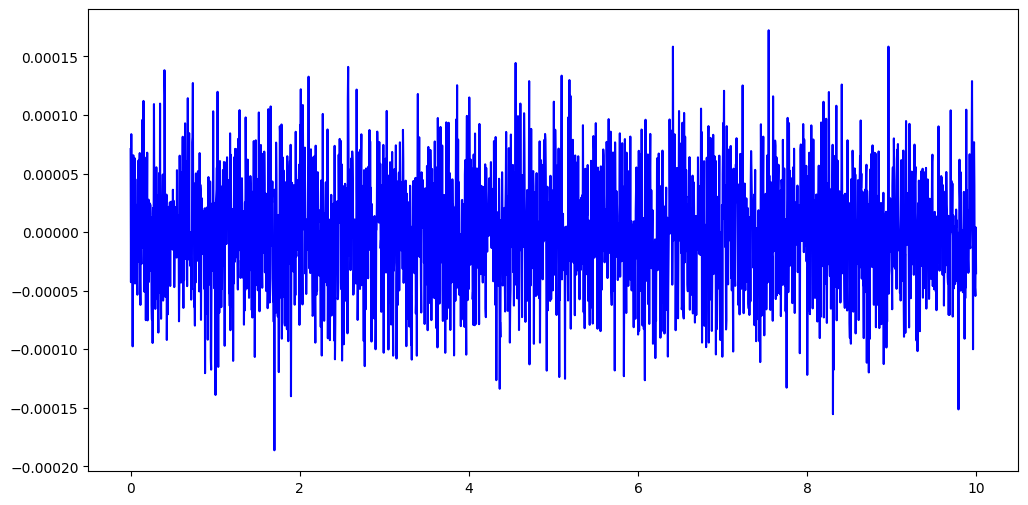

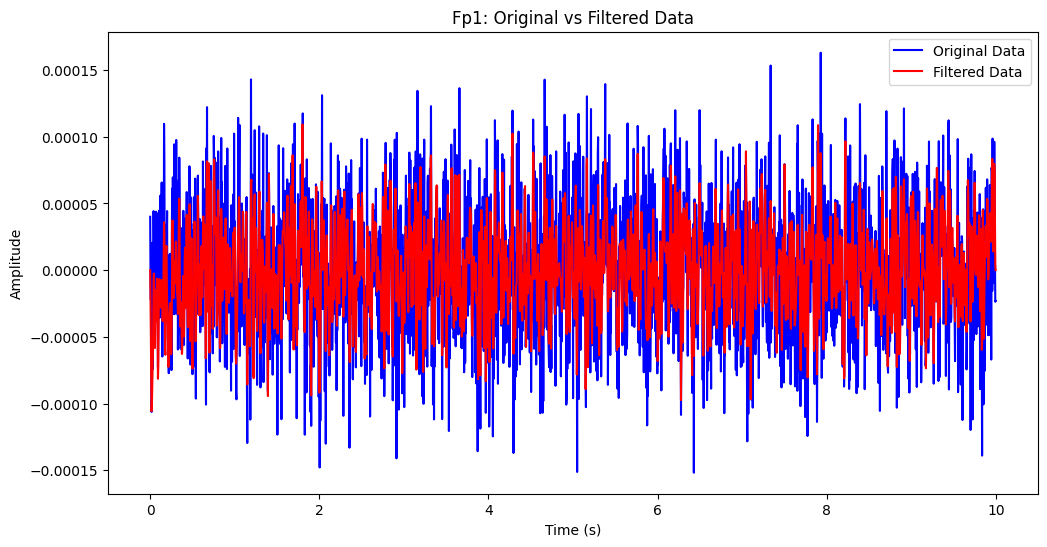

In [ ]:
import numpy as np
import mne
import matplotlib.pyplot as plt

# Define the channel names, types, and sampling rate
ch_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'EOG']
ch_types = ['eeg'] * 8 + ['eog']
sfreq = 250

# Simulate the EEG and EOG data
n_times = 2500  # Number of time points
eeg_data = np.random.randn(8, n_times) * 50e-6  # Simulate EEG data and scale to a realistic range
eog_data = np.random.randn(1, n_times) * 150e-6  # Simulate EOG data and scale to a realistic range

# Combine the EEG and EOG data
combined_data = np.vstack([eeg_data, eog_data])

# Create an MNE info dictionary
info = mne.create_info(ch_names, sfreq, ch_types=ch_types)

# Create an MNE Raw object from the combined EEG and EOG data
raw = mne.io.RawArray(combined_data, info)

# Apply a band-pass filter
raw_filtered = raw.copy().filter(1, 50)

# Select a channel to visualize
channel_to_visualize = 0  # You can change this value to select a different channel

# Get the data and times for the selected channel
original_data, times = raw[channel_to_visualize]
filtered_data, _ = raw_filtered[channel_to_visualize]

# Squeeze the data arrays to match the dimensions with the times array
original_data = original_data.squeeze()
filtered_data = filtered_data.squeeze()

# Plot the original data (non-filtered) and the filtered data on a single plot
plt.figure(figsize=(12, 6))
plt.plot(times, original_data, label='Original Data', color='blue')
plt.plot(times, filtered_data, label='Filtered Data', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'{ch_names[channel_to_visualize]}: Original vs Filtered Data')
plt.legend()
plt.show()


#Artifact removal

In [ ]:
!pip install mne
!pip install --upgrade mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 36.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Creating RawArray with float64 data, n_channels=10, n_times=2500
    Range : 0 ... 2499 =      0.000 ...     9.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 0.1s.
Using EOG channel: EOG
... filtering ICA sources
Setting up ba

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
<ipython-input-54-0352569643a8>:45: RuntimeWarning: Using n_components=8 (resulting in n_components_=8) may lead to an unstable mixing matrix estimation because the ratio between the largest (2.5) and smallest (1.4e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 7
  ica.fit(raw_filtered_with_artifacts)
<ipython-input-54-0352569643a8>:51: RuntimeWarning: filter_length (4096) is longer than the signal (2500), distortion is likely. Reduce filter length or filter a longer signal.
  e

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

Using threshold: 0.32 for CTPS ECG detection


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
<ipython-input-54-0352569643a8>:51: RuntimeWarning: filter_length (4096) is longer than the signal (2500), distortion is likely. Reduce filter length or filter a longer signal.
  eog_inds, eog_scores = ica.find_bads_eog(raw_filtered_with_artifacts, ch_name='EOG')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2500 samples (10.000 sec)

Number of ECG events detected : 16 (average pulse 96 / min.)


<ipython-input-54-0352569643a8>:55: RuntimeWarning: filter_length (4096) is longer than the signal (2500), distortion is likely. Reduce filter length or filter a longer signal.
  ecg_inds, ecg_scores = ica.find_bads_ecg(raw_filtered_with_artifacts, ch_name='ECG')


Not setting metadata
16 matching events found
No baseline correction applied
Using data from preloaded Raw for 16 events and 251 original time points ...
2 bad epochs dropped
Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 0 ICA components
    Projecting back using 8 PCA components


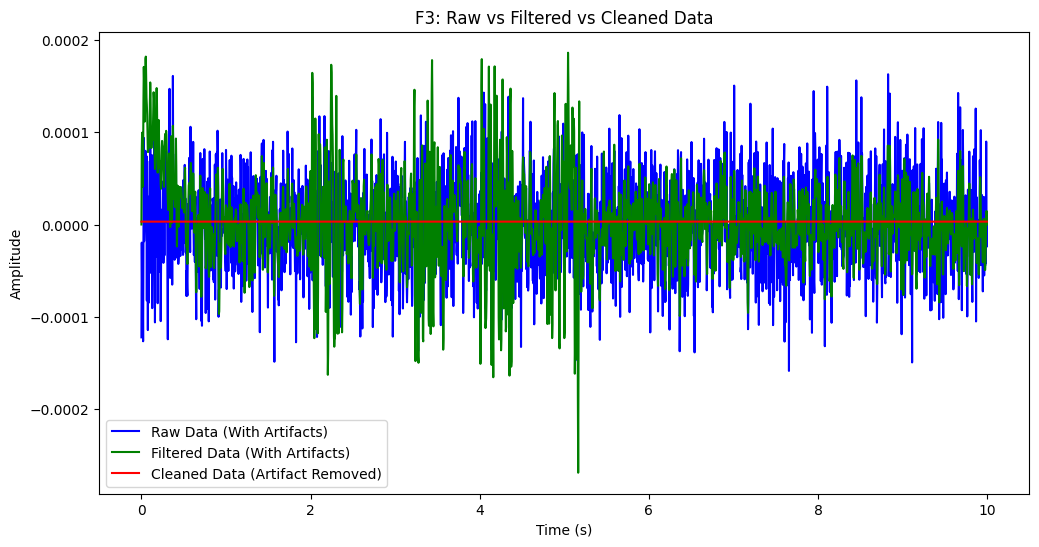

In [ ]:
import numpy as np
import mne
import matplotlib.pyplot as plt

# Define the channel names, types, and sampling rate
ch_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'EOG', 'ECG']
ch_types = ['eeg'] * 8 + ['eog', 'ecg']
sfreq = 250

# Simulate the EEG, EOG, and ECG data
n_times = 2500  # Number of time points
eeg_data = np.random.randn(8, n_times) * 50e-6  # Simulate EEG data and scale to a realistic range
eog_data = np.random.randn(1, n_times) * 500e-6  # Simulate EOG data and scale to a stronger range
ecg_data = np.random.randn(1, n_times) * 500e-6  # Simulate ECG data and scale to a stronger range

# Create an info object
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Add artifacts to the EEG data
eeg_data_with_artifacts = eeg_data.copy()

# Add EOG artifacts to EEG data (eye blinks)
eeg_data_with_artifacts[0, 500:600] += np.random.randn(100) * 5e-4  # Add EOG artifact to channel Fp1
eeg_data_with_artifacts[1, 1000:1100] += np.random.randn(100) * 5e-4  # Add EOG artifact to channel Fp2

# Add ECG artifacts to EEG data (heartbeat)
eeg_data_with_artifacts[4, 800:900] += np.random.randn(100) * 5e-4  # Add ECG artifact to channel C3
eeg_data_with_artifacts[5, 1200:1300] += np.random.randn(100) * 5e-4  # Add ECG artifact to channel C4

# Add EMG artifacts to EEG data (muscle artifacts)
eeg_data_with_artifacts[3, 1500:1600] += np.random.randn(100) * 5e-4  # Add EMG artifact to channel F4

# Combine the EEG, EOG, and ECG data
combined_data_with_artifacts = np.vstack([eeg_data_with_artifacts, eog_data, ecg_data])

# Create an MNE Raw object from the combined EEG, EOG, and ECG data with artifacts
raw_with_artifacts = mne.io.RawArray(combined_data_with_artifacts, info)

# Apply a band-pass filter
raw_filtered_with_artifacts = raw_with_artifacts.copy()
raw_filtered_with_artifacts.filter(1, 50)

# Set EEG reference to average reference
raw_filtered_with_artifacts.set_eeg_reference(ref_channels='average')

# Fit the ICA to the raw data with artifacts
ica = mne.preprocessing.ICA(n_components=8, method='fastica', random_state=42, max_iter=1000)
ica.fit(raw_filtered_with_artifacts)

# Identify and remove artifact components
ica.exclude = []

# Identify and remove EOG artifacts
eog_inds, eog_scores = ica.find_bads_eog(raw_filtered_with_artifacts, ch_name='EOG')
ica.exclude.extend(eog_inds)

# Identify and remove ECG artifacts
ecg_inds, ecg_scores = ica.find_bads_ecg(raw_filtered_with_artifacts, ch_name='ECG')
ica.exclude.extend(ecg_inds)

# Apply ICA to remove artifact components
raw_filtered_cleaned = raw_filtered_with_artifacts.copy()
ica.apply(raw_filtered_cleaned)

# Get the data and times for the selected channel
raw_data, times = raw_with_artifacts[channel_to_visualize]
filtered_data, _ = raw_filtered_with_artifacts[channel_to_visualize]
filtered_cleaned_data, _ = raw_filtered_cleaned[channel_to_visualize]

# Squeeze the data arrays to match the dimensions with the times array
raw_data = raw_data.squeeze()
filtered_data = filtered_data.squeeze()
filtered_cleaned_data = filtered_cleaned_data.squeeze()

# Plot the raw data with artifacts, the filtered data with artifacts, and the cleaned data after artifact correction on a single plot
plt.figure(figsize=(12, 6))
plt.plot(times, raw_data, label='Raw Data (With Artifacts)', color='blue')
plt.plot(times, filtered_data, label='Filtered Data (With Artifacts)', color




# Select a channel to visualize
channel_to_visualize = 2 # You can change this value to select a different channel


# Get the data and times for the selected channel
raw_data, times = raw_with_artifacts[channel_to_visualize]
filtered_data, _ = raw_filtered_with_artifacts[channel_to_visualize]
filtered_cleaned_data, _ = raw_filtered_cleaned[channel_to_visualize]


# Squeeze the data arrays to match the dimensions with the times array
raw_data = raw_data.squeeze()
filtered_data = filtered_data.squeeze()
filtered_cleaned_data = filtered_cleaned_data.squeeze()

# Plot the filtered data (before artifact correction) and the cleaned data (after artifact correction) on a single plot
plt.figure(figsize=(12, 6))
plt.plot(times, raw_data, label='Raw Data (With Artifacts)', color='blue')
plt.plot(times, filtered_data, label='Filtered Data (With Artifacts)', color='green')
plt.plot(times, filtered_cleaned_data, label='Cleaned Data (Artifact Removed)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'{ch_names[channel_to_visualize]}: Raw vs Filtered vs Cleaned Data')
plt.legend()
plt.show()

# Baseline correction

In [ ]:
# Compute the average signal during a baseline period
baseline_start = 0
baseline_end = 1
baseline = np.mean(eeg_data_cleaned[:, t < baseline_end], axis=1)

# Subtract the baseline from the EEG data
eeg_data_corrected = eeg_data_cleaned - baseline[:, np.newaxis]


#Feature Extraction
After pre-processing, the next step is feature extraction, which involves identifying relevant features from the signal that can be used for further analysis. Features can be time-domain, frequency-domain, or time-frequency features, and are chosen based on the specific application. For example, in EEG studies, features such as power in different frequency bands or coherence between different electrode pairs can be extracted.

#Power Spectral Density (PSD)

In [ ]:
from scipy.signal import welch

# Compute the Power Spectral Density (PSD) for each channel
psd = np.zeros((num_channels, len(f)))
for channel in range(num_channels):
    f, psd[channel, :] = welch(eeg_data_filtered[channel], fs=fs, nperseg=256)

# Compute the total power in each frequency band
delta_power = np.sum(psd[:, np.logical_and(f >= 1, f <= 4)], axis=1)
theta_power = np.sum(psd[:, np.logical_and(f >= 4, f <= 8)], axis=1)
alpha_power = np.sum(psd[:, np.logical_and(f >= 8, f <= 13)], axis=1)
beta_power = np.sum(psd[:, np.logical_and(f >= 13, f <= 30)], axis=1)
gamma_power = np.sum(psd[:, np.logical_and(f >= 30, f <= 50)], axis=1)


#Classification
The final step in the signal processing pipeline is classification, which involves using machine learning algorithms to classify the signal based on the extracted features. Classification algorithms include linear discriminant analysis (LDA), support vector machines (SVM), and artificial neural networks (ANN). The choice of algorithm depends on the specific application and the nature of the signal.

Overall, the signal processing pipeline is an iterative process, where each step builds upon the previous one. By following this pipeline, researchers can extract meaningful information from raw signals and gain insights into complex systems such as the human brain.

I hope this explanation provides a clear understanding of the signal processing pipeline. The Python code snippets provided demonstrate how different steps in the pipeline can be implemented using the scipy library.